In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import cufflinks as cf
import plotly
from sklearn.neighbors import KNeighborsClassifier
import datetime
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
import math
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import os
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_auc_score, precision_recall_fscore_support
from sklearn import metrics, linear_model
import warnings
warnings.filterwarnings('ignore')
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification

# Import imbalace technique algorithims
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
import os
from sklearn.metrics import classification_report
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_auc_score, precision_recall_fscore_support
from sklearn import metrics, linear_model
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import average_precision_score, matthews_corrcoef
import warnings
from imblearn.over_sampling import SMOTE, ADASYN
warnings.filterwarnings('ignore')
import matplotlib
import sklearn
from IPython.display import HTML
#from IPython.display import YouTubeVideo
from sklearn.linear_model import LogisticRegression # Importing Classifier Step
import pickle
import os
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split

# Import Data

Using the full dataset that is not split into train/val/test

In [2]:
print(os.getcwd())
relative_path = os.path.abspath(os.path.join(os.getcwd(), "../../"))
data = pd.read_csv(relative_path+'/preprocessed_data/non_split_dataset_OHE/total_subset.csv')
data = data.drop(['evil','userId'],axis=1)
print(data.shape)

a:\Desktop\FYP Final Files\notebooks\Supervised_ML


(1141078, 13)


In [3]:
data.head(1)

,processId,parentProcessId,mountNamespace,eventId,argsNum,returnValue,System_Core,Amazon_AWS,Container_Virtualization,Maintenance_Package_Management,Security_Monitoring,Utility_Misc,sus
0,1,0,1,157,5,0,1,0,0,0,0,0,1


Dropping target feature

In [4]:
X = data.drop(['sus'],axis=1)
y = data['sus']

Quick look at the data

In [5]:
X.head(5)

,processId,parentProcessId,mountNamespace,eventId,argsNum,returnValue,System_Core,Amazon_AWS,Container_Virtualization,Maintenance_Package_Management,Security_Monitoring,Utility_Misc
0,1,0,1,157,5,0,1,0,0,0,0,0
1,1,0,1,3,1,0,1,0,0,0,0,0
2,1,0,1,1010,0,0,1,0,0,0,0,0
3,1,1,0,21,2,2,0,0,0,0,0,1
4,1,1,0,1005,4,0,0,0,0,0,0,1


In [6]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: sus, dtype: int64

# Helper function that will assist in printing the metrics

In [7]:
def print_metrics(y_true, y_predicted):

    accuracy = accuracy_score(y_true, y_predicted)   
    metrics_results = precision_recall_fscore_support(y_true, y_predicted, average="weighted", pos_label=1)
    average_precision = average_precision_score(y_true, y_predicted)
    balanced_accuracy = balanced_accuracy_score(y_true, y_predicted)
    mcc = matthews_corrcoef(y_true, y_predicted)
    
    print(f'Accuracy:\t{accuracy:.3f}')
    print(f'Precision:\t{metrics_results[0]}')
    print(f'Recall:\t\t{metrics_results[1]:.3f}')
    print(f'F1-Score:\t{metrics_results[2]:.3f}')
    print("Average Precision Score:", average_precision)
    print("Balanced Accuracy Score:", balanced_accuracy)
    print("Matthews Correlation Coefficient (MCC):", mcc)
    print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_true , y_predicted)))
    
    # make confusion matrix
    confusion_matrixs = confusion_matrix(y_true, y_predicted)
    

    TP = confusion_matrixs[1][1]
    TN = confusion_matrixs[0][0]
    FP = confusion_matrixs[0][1]
    FN = confusion_matrixs[1][0]


    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrixs, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    print("True Positives (TP):", TP)
    print("True Negatives (TN):", TN)
    print("False Positives (FP):", FP)
    print("False Negatives (FN):", FN)

    # Print roc curve
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_predicted)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, )
    display.plot()
    plt.show()


    precision, recall, _ = precision_recall_curve(y_true, y_predicted)

    # Calculate the area under the curve
    pr_auc = auc(recall, precision)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.show()

# Split the dataset into training and testing

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=0)

# Lets get a baseline score

### Logistic Regression

Define and fit model to training data

In [9]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression()

Predict on test data

In [10]:
y_pred = logistic_regression.predict(X_test)

Lets print the metrics

Accuracy:	0.985
Precision:	0.9851026783936984
Recall:		0.985
F1-Score:	0.985
Average Precision Score: 0.9133786397628432
Balanced Accuracy Score: 0.9673537995619819
Matthews Correlation Coefficient (MCC): 0.9423360589755257
AUC : 0.96735


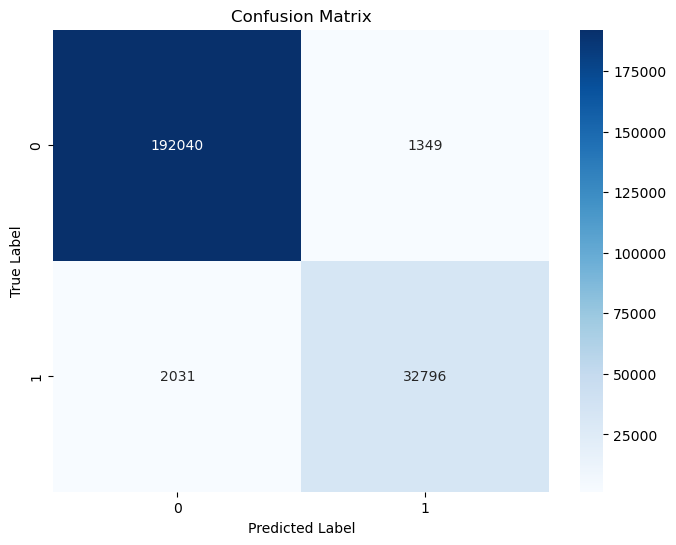

True Positives (TP): 32796
True Negatives (TN): 192040
False Positives (FP): 1349
False Negatives (FN): 2031


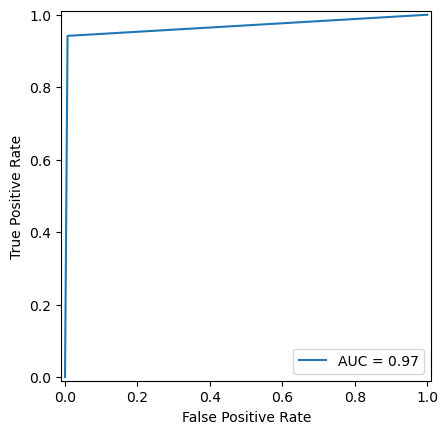

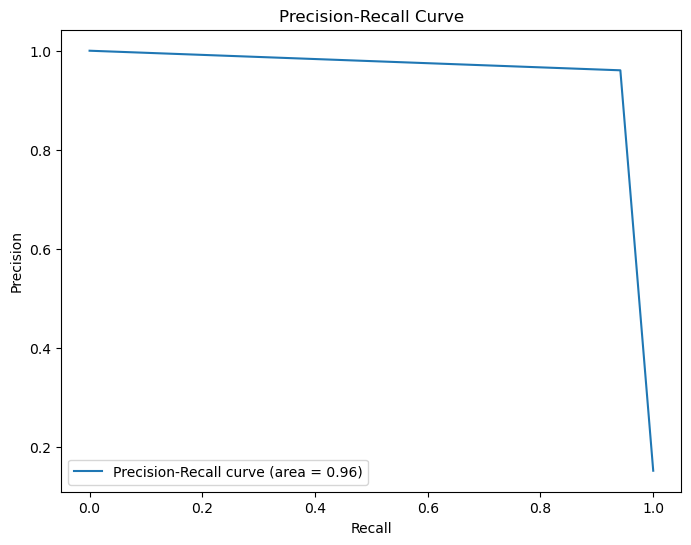

In [11]:
print_metrics(y_test,y_pred)

# Dealing with class imbalance
We are getting great scores but lets see if we can mess with the class imbalance and get an even better score

Splitting the data from the orignal set before any data manipulation

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

Lets see what our data looks like now

In [13]:
print(X_train.shape , "  X_train")
print(X_test.shape , "  X_test")
print(y_train.shape , "  y_train")
print(y_test.shape , "  y_test")

(912862, 12)   X_train
(228216, 12)   X_test
(912862,)   y_train
(228216,)   y_test


## Under Sampling

In [14]:
underSampler = RandomUnderSampler(random_state=0)
X_under_sampled_train , y_under_sampled_train = underSampler.fit_resample(X_train,y_train)

Lets see what our data looks like now

In [15]:
print("------------Before under sampling------------")
print(y_test.value_counts())
print("------------After under sampling------------")
print(y_under_sampled_train.value_counts())



------------Before under sampling------------
sus
0    193389
1     34827
Name: count, dtype: int64
------------After under sampling------------
sus
0    138687
1    138687
Name: count, dtype: int64


Train a logistic regression model on our undersampled data

In [16]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_under_sampled_train,y_under_sampled_train)

LogisticRegression()

In [17]:
# cv_predictions = cross_val_predict(logistic_regression, X_under_sampled_train, y_under_sampled_train, cv=5)
# # Calculate evaluation metrics
# cv_accuracy = accuracy_score(y_under_sampled_train, cv_predictions)
# cv_precision = precision_score(y_under_sampled_train, cv_predictions)
# cv_recall = recall_score(y_under_sampled_train, cv_predictions)
# cv_f1_score = f1_score(y_under_sampled_train, cv_predictions)

In [18]:
# # Print the cross-validation scores
# print("Cross-Validation Metrics:")
# print("Accuracy:", cv_accuracy)
# print("Precision:", cv_precision)
# print("Recall:", cv_recall)
# print("F1 Score:", cv_f1_score)

And predict on untouched test data

In [19]:
y_pred = logistic_regression.predict(X_test)

Accuracy:	0.979
Precision:	0.9791943903902806
Recall:		0.979
F1-Score:	0.979
Average Precision Score: 0.8753892509975141
Balanced Accuracy Score: 0.9681657202963165
Matthews Correlation Coefficient (MCC): 0.9192254461450874
AUC : 0.96817


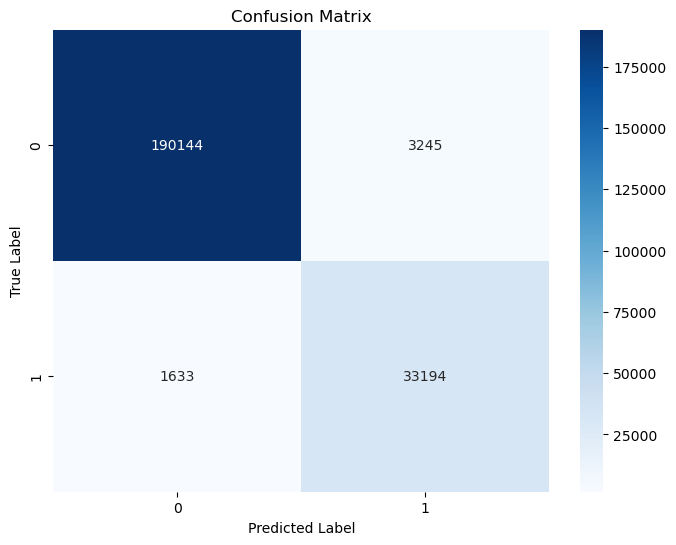

True Positives (TP): 33194
True Negatives (TN): 190144
False Positives (FP): 3245
False Negatives (FN): 1633


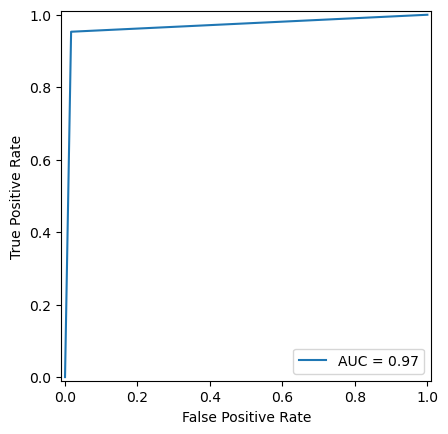

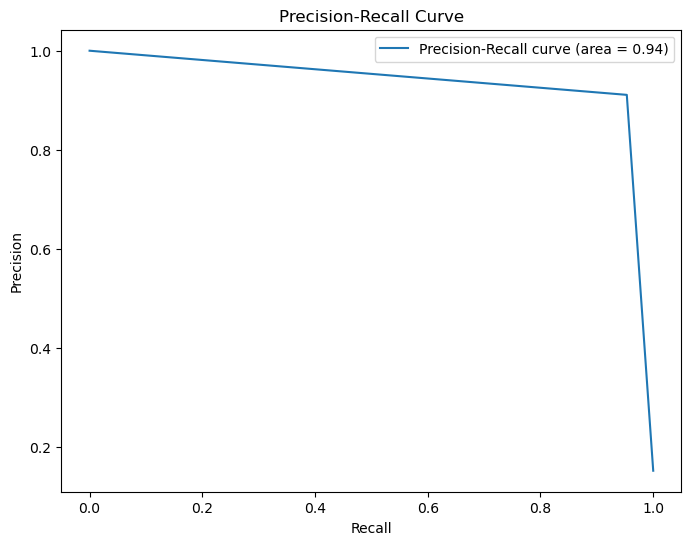

In [20]:
print_metrics(y_test,y_pred)

## Over Sampling

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [22]:
print(X_train.shape , "  X_train")
print(X_test.shape , "  X_test")
print(y_train.shape , "  y_train")
print(y_test.shape , "  y_test")

(912862, 12)   X_train
(228216, 12)   X_test
(912862,)   y_train
(228216,)   y_test


In [23]:
overSampler = RandomOverSampler(random_state=0)
X_over_sampled_train , y_over_sampled_train = overSampler.fit_resample(X_train,y_train)

In [24]:
print("------------Before under sampling------------")
print(y_test.value_counts())
print("------------After under sampling------------")
print(y_over_sampled_train.value_counts())



------------Before under sampling------------
sus
0    193389
1     34827
Name: count, dtype: int64
------------After under sampling------------
sus
0    774175
1    774175
Name: count, dtype: int64


Train a logistic regression model on our over sampled data

In [25]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_over_sampled_train, y_over_sampled_train)

y_pred = logistic_regression.predict(X_test)

Accuracy:	0.978
Precision:	0.9782521990046029
Recall:		0.978
F1-Score:	0.978
Average Precision Score: 0.8695240702486553
Balanced Accuracy Score: 0.9676069241096248
Matthews Correlation Coefficient (MCC): 0.9154708064054328
AUC : 0.96761


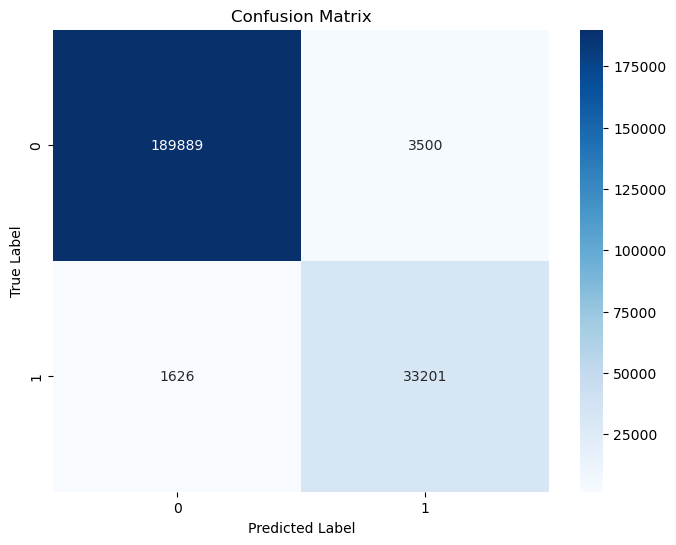

True Positives (TP): 33201
True Negatives (TN): 189889
False Positives (FP): 3500
False Negatives (FN): 1626


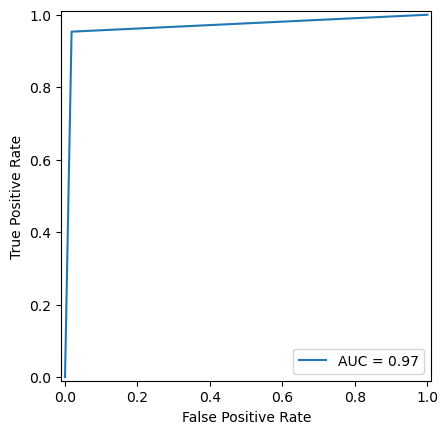

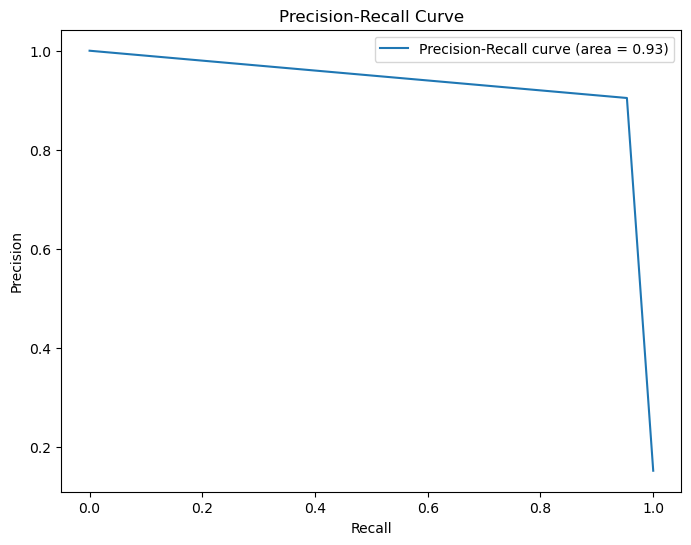

In [26]:
print_metrics(y_test,y_pred)

## Smote

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [28]:
print(X_train.shape , "  X_train")
print(X_test.shape , "  X_test")
print(y_train.shape , "  y_train")
print(y_test.shape , "  y_test")

(912862, 12)   X_train
(228216, 12)   X_test
(912862,)   y_train
(228216,)   y_test


In [29]:
smote_OS = SMOTE(random_state=0)
X_smote_train , y_smote_train = smote_OS.fit_resample(X_train,y_train)

In [30]:
print("------------Before under sampling------------")
print(y_test.value_counts())
print("------------After under sampling------------")
print(y_smote_train.value_counts())



------------Before under sampling------------
sus
0    193389
1     34827
Name: count, dtype: int64
------------After under sampling------------
sus
0    774175
1    774175
Name: count, dtype: int64


Train a logistic regression model on SMOTE modified data

In [31]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_smote_train, y_smote_train)

y_pred = logistic_regression.predict(X_test)

Accuracy:	0.971
Precision:	0.9730892011792583
Recall:		0.971
F1-Score:	0.972
Average Precision Score: 0.8375315793196656
Balanced Accuracy Score: 0.9640779780894793
Matthews Correlation Coefficient (MCC): 0.89464345429593
AUC : 0.96408


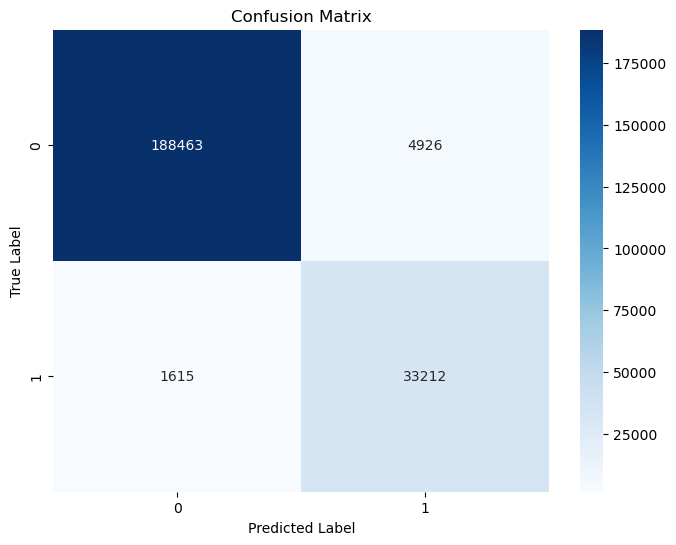

True Positives (TP): 33212
True Negatives (TN): 188463
False Positives (FP): 4926
False Negatives (FN): 1615


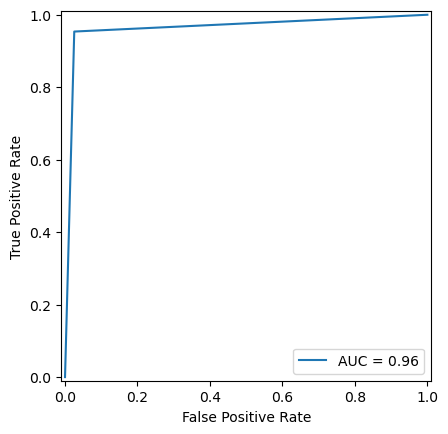

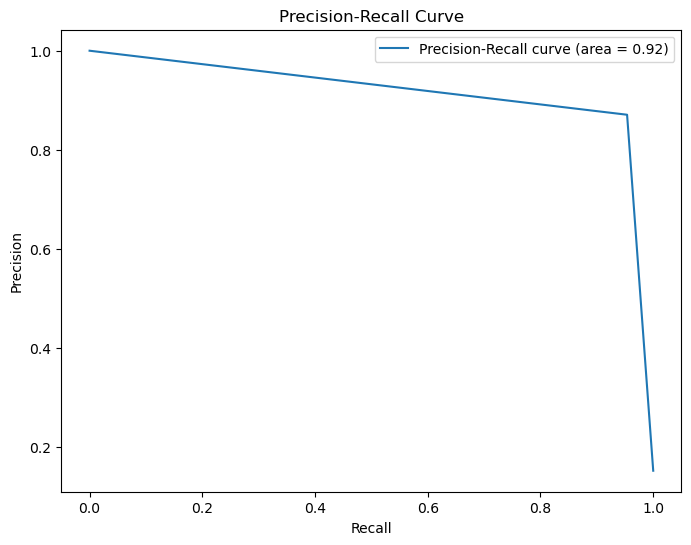

In [32]:
print_metrics(y_test,y_pred)

## Adasyn

In [33]:
adasyn = ADASYN(random_state=0)
X_adasyn_train , y_adasyn_train = adasyn.fit_resample(X_train,y_train)

In [34]:
print("------------Before under sampling------------")
print(y_test.value_counts())
print("------------After under sampling------------")
print(y_adasyn_train.value_counts())



------------Before under sampling------------
sus
0    193389
1     34827
Name: count, dtype: int64
------------After under sampling------------
sus
1    775292
0    774175
Name: count, dtype: int64


Train a logistic regression model on adasyn modified data

In [35]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_adasyn_train, y_adasyn_train)

y_pred = logistic_regression.predict(X_test)

Accuracy:	0.881
Precision:	0.9323323642163174
Recall:		0.881
F1-Score:	0.893
Average Precision Score: 0.5605485076283281
Balanced Accuracy Score: 0.9277551364478962
Matthews Correlation Coefficient (MCC): 0.6931551685475974
AUC : 0.92776


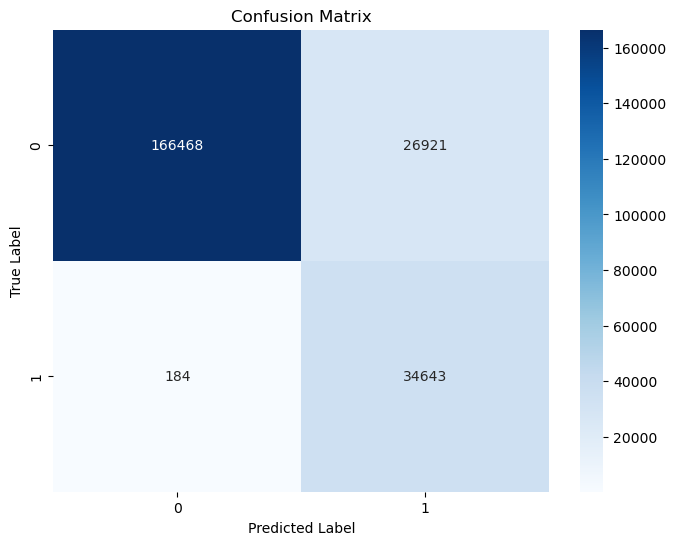

True Positives (TP): 34643
True Negatives (TN): 166468
False Positives (FP): 26921
False Negatives (FN): 184


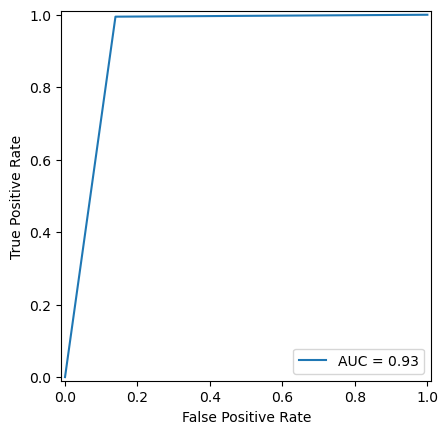

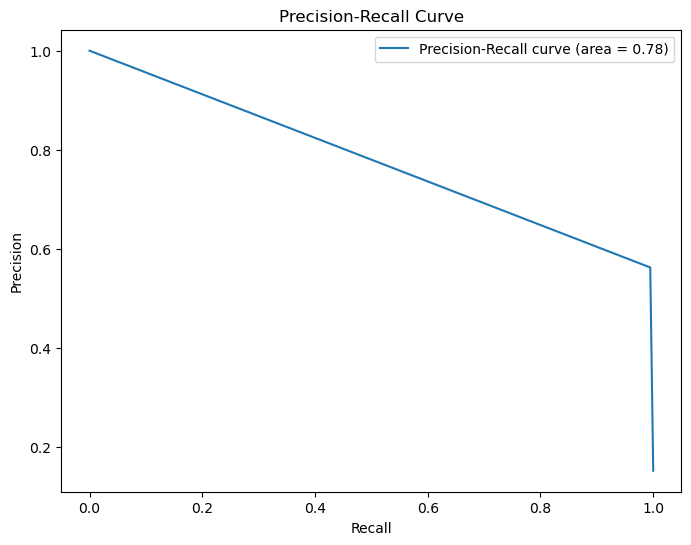

In [36]:
print_metrics(y_test,y_pred)

# Now that we have a baseline setup, lets try different models with the above data

- X_train, X_test - Original Data
- X_under_sampled_train , y_under_sampled_train - Under Sampled Data
- X_over_sampled_train , y_over_sampled_train - Over Sampled Data
- X_smote_train , y_smote_train - SMOTE modified Data
- X_adasyn_train , y_adasyn_train - ADASYN modified Data

## Decision Tree

In [37]:
# Declare Model
decision_tree = DecisionTreeClassifier(random_state=0)

### Original Data

Accuracy:	0.988
Precision:	0.9882616640871971
Recall:		0.988
F1-Score:	0.988
Average Precision Score: 0.9316316624370522
Balanced Accuracy Score: 0.9734400425604938
Matthews Correlation Coefficient (MCC): 0.9545502991621595
AUC : 0.97344


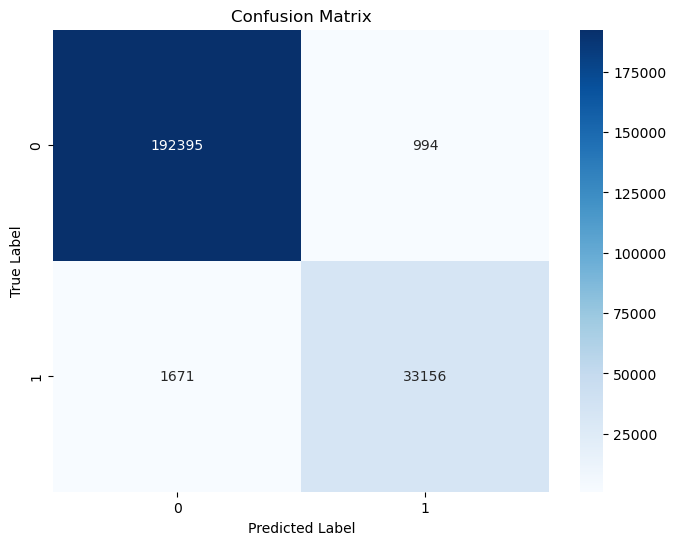

True Positives (TP): 33156
True Negatives (TN): 192395
False Positives (FP): 994
False Negatives (FN): 1671


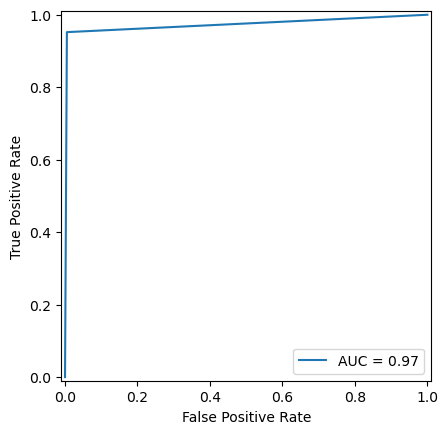

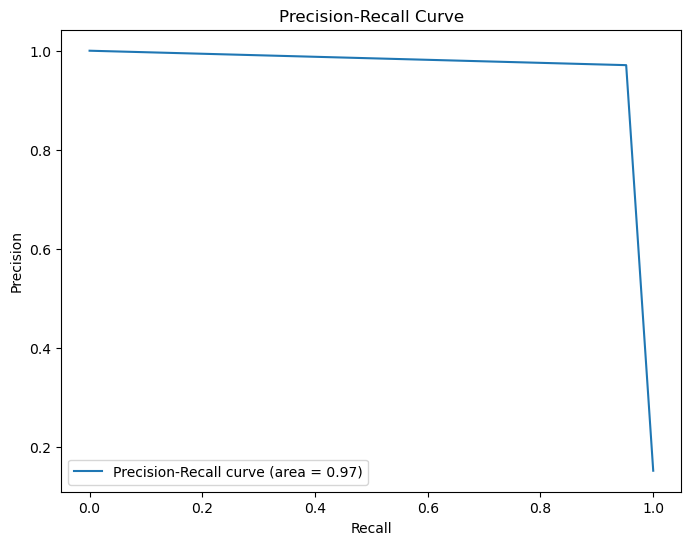

In [38]:
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print_metrics(y_test,y_pred)

### UnderSampled Data

Accuracy:	0.977
Precision:	0.978831904576226
Recall:		0.977
F1-Score:	0.978
Average Precision Score: 0.8694551598573413
Balanced Accuracy Score: 0.9746259734126417
Matthews Correlation Coefficient (MCC): 0.9169718210313544
AUC : 0.97463


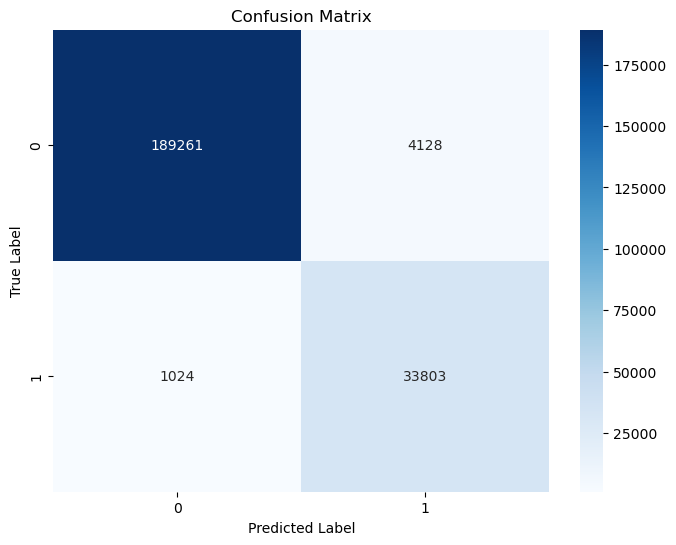

True Positives (TP): 33803
True Negatives (TN): 189261
False Positives (FP): 4128
False Negatives (FN): 1024


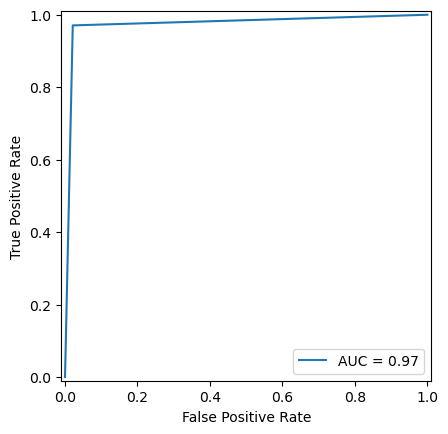

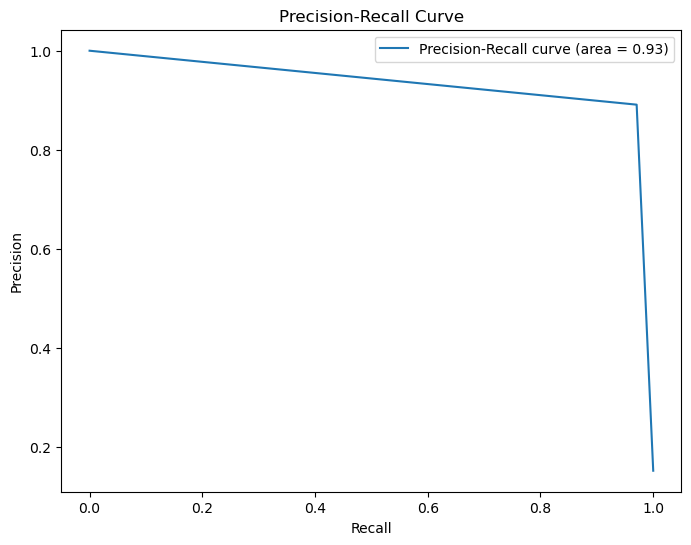

In [39]:
decision_tree.fit(X_under_sampled_train, y_under_sampled_train)
y_pred = decision_tree.predict(X_test)
print_metrics(y_test,y_pred)

### OverSampled Data

Accuracy:	0.977
Precision:	0.9788739763944991
Recall:		0.977
F1-Score:	0.978
Average Precision Score: 0.8697277165852173
Balanced Accuracy Score: 0.9746452277473527
Matthews Correlation Coefficient (MCC): 0.917144558733742
AUC : 0.97465


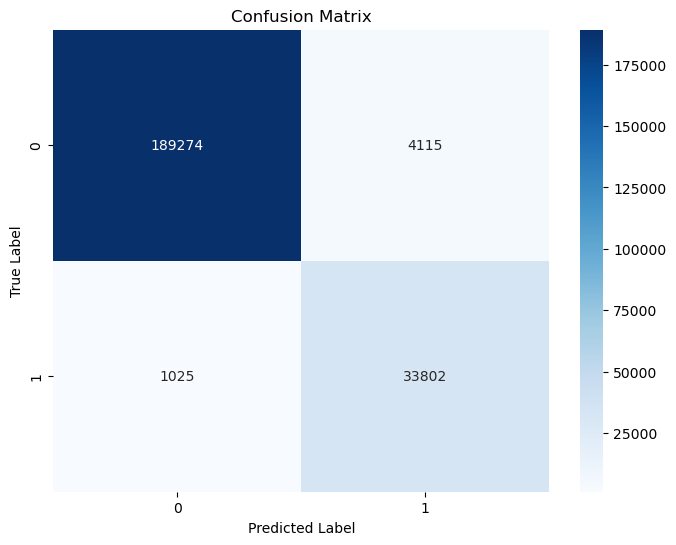

True Positives (TP): 33802
True Negatives (TN): 189274
False Positives (FP): 4115
False Negatives (FN): 1025


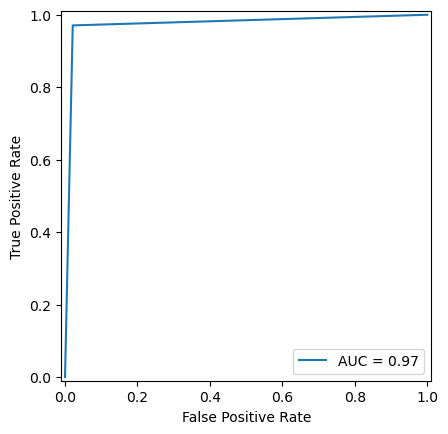

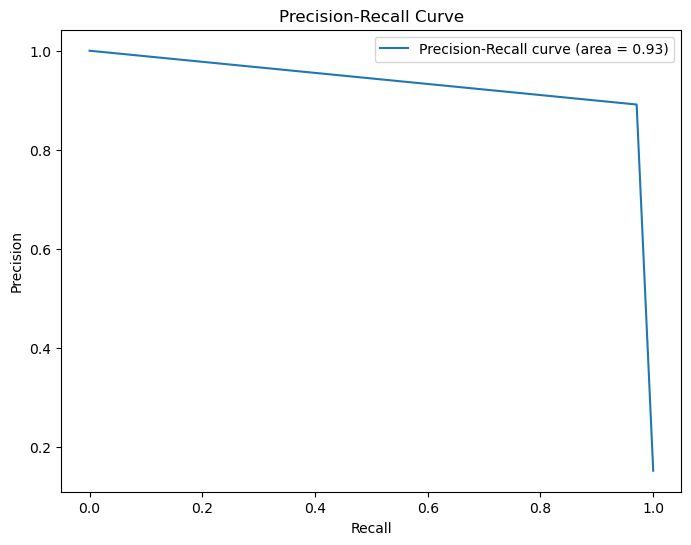

In [40]:
decision_tree.fit(X_over_sampled_train, y_over_sampled_train)
y_pred = decision_tree.predict(X_test)
print_metrics(y_test,y_pred)

### SMOTE Data

Accuracy:	0.977
Precision:	0.9788834183103754
Recall:		0.977
F1-Score:	0.978
Average Precision Score: 0.8698143309054331
Balanced Accuracy Score: 0.9746084847378838
Matthews Correlation Coefficient (MCC): 0.917189795764965
AUC : 0.97461


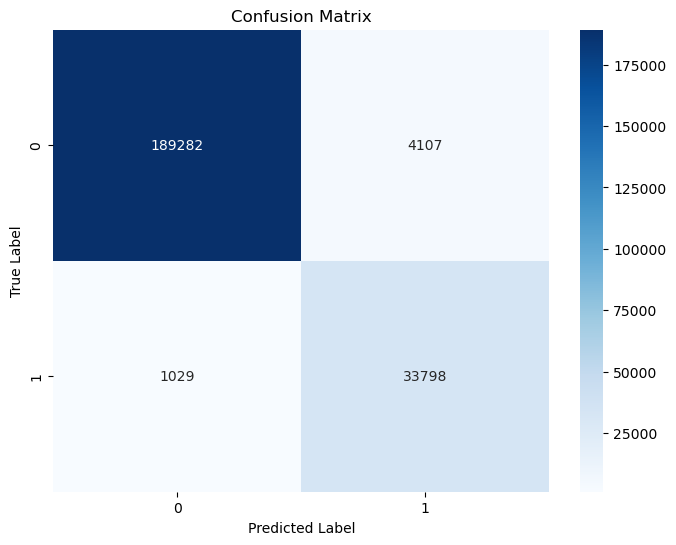

True Positives (TP): 33798
True Negatives (TN): 189282
False Positives (FP): 4107
False Negatives (FN): 1029


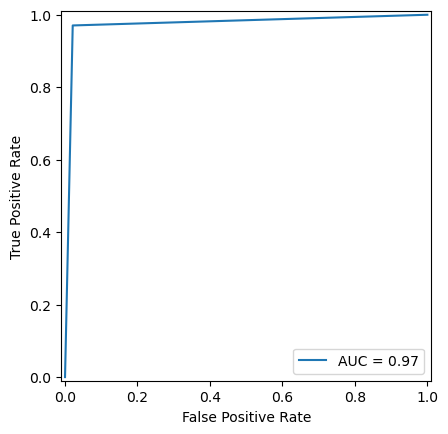

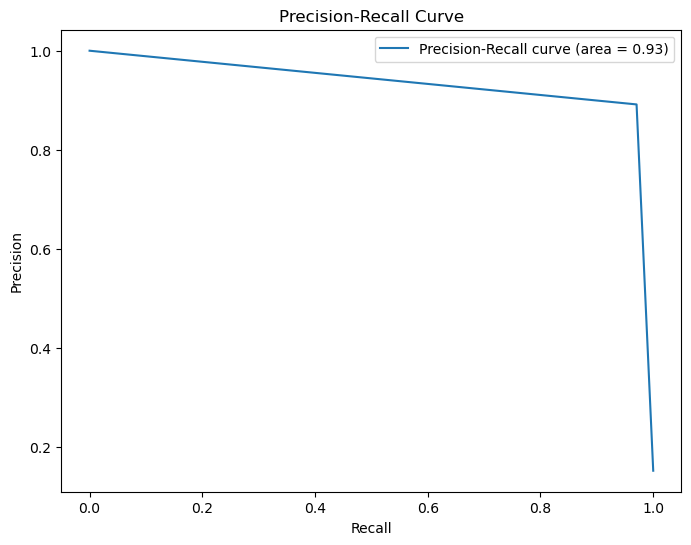

In [41]:
decision_tree.fit(X_smote_train, y_smote_train)
y_pred = decision_tree.predict(X_test)
print_metrics(y_test,y_pred)

### ADASYN Data

Accuracy:	0.894
Precision:	0.9371977721466915
Recall:		0.894
F1-Score:	0.904
Average Precision Score: 0.5901613608989206
Balanced Accuracy Score: 0.9366860598533397
Matthews Correlation Coefficient (MCC): 0.718276739386263
AUC : 0.93669


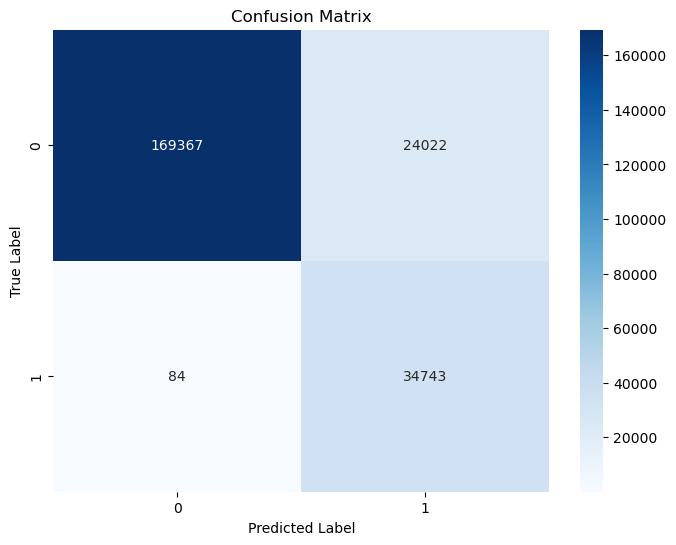

True Positives (TP): 34743
True Negatives (TN): 169367
False Positives (FP): 24022
False Negatives (FN): 84


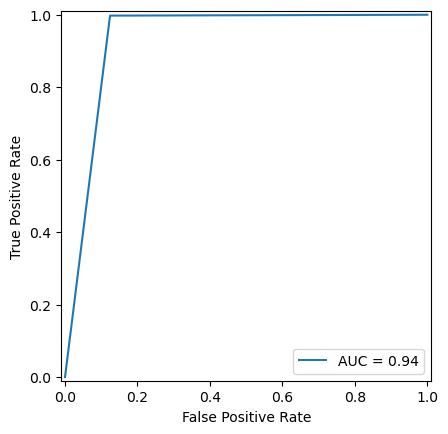

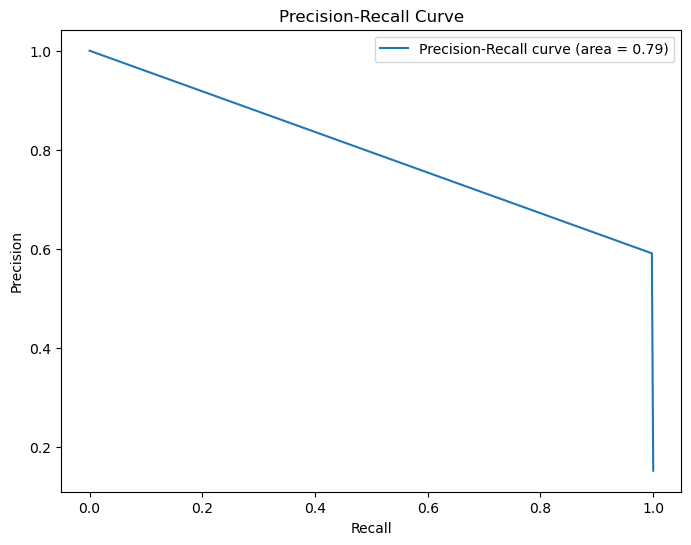

In [42]:
decision_tree.fit(X_adasyn_train, y_adasyn_train)
y_pred = decision_tree.predict(X_test)
print_metrics(y_test,y_pred)

## Random Forest

In [43]:
# Declare Random Forest Model
randomforest = RandomForestClassifier(random_state=0)

### Original Data

Accuracy:	0.988
Precision:	0.9882616640871971
Recall:		0.988
F1-Score:	0.988
Average Precision Score: 0.9316316624370522
Balanced Accuracy Score: 0.9734400425604938
Matthews Correlation Coefficient (MCC): 0.9545502991621595
AUC : 0.97344


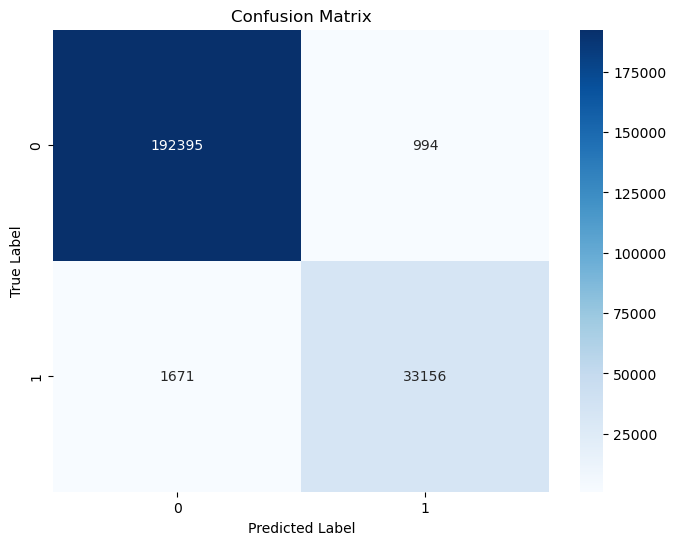

True Positives (TP): 33156
True Negatives (TN): 192395
False Positives (FP): 994
False Negatives (FN): 1671


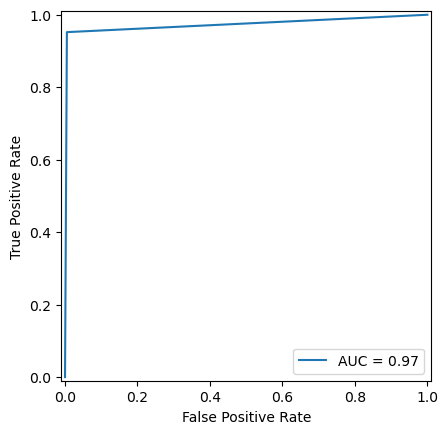

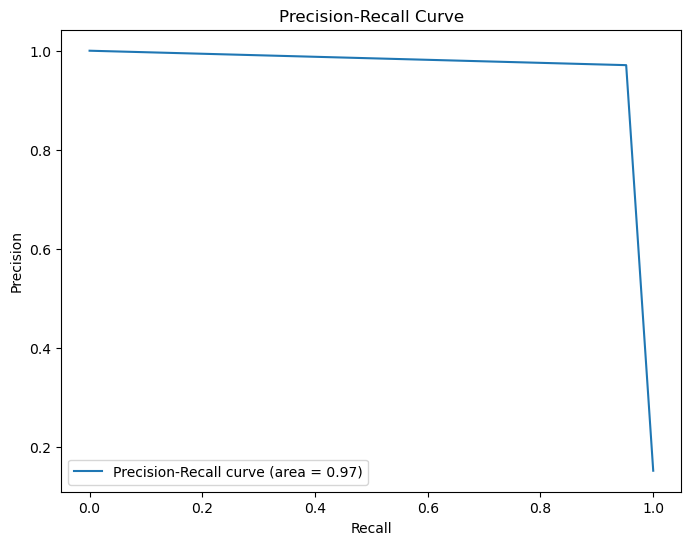

In [44]:
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
print_metrics(y_test,y_pred)

### UnderSampled Data

Accuracy:	0.977
Precision:	0.9788546640498841
Recall:		0.977
F1-Score:	0.978
Average Precision Score: 0.8696124565745095
Balanced Accuracy Score: 0.9746205292202155
Matthews Correlation Coefficient (MCC): 0.9170677847953053
AUC : 0.97462


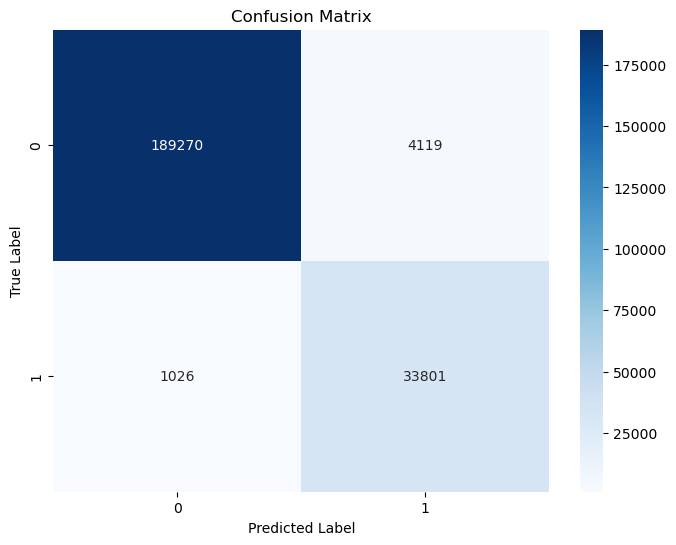

True Positives (TP): 33801
True Negatives (TN): 189270
False Positives (FP): 4119
False Negatives (FN): 1026


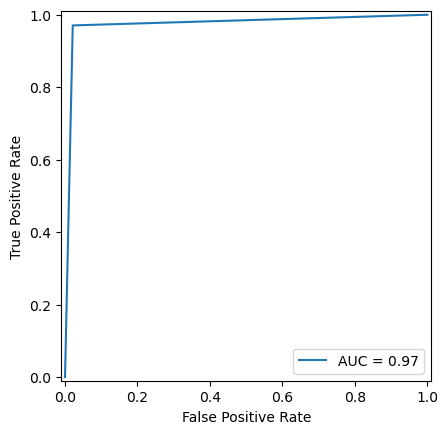

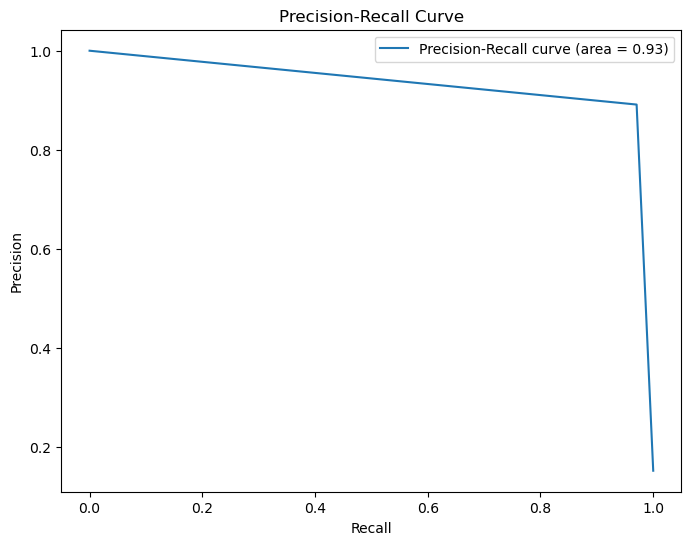

In [45]:
randomforest.fit(X_under_sampled_train, y_under_sampled_train)
y_pred = randomforest.predict(X_test)
print_metrics(y_test,y_pred)

### OverSampled Data

Accuracy:	0.980
Precision:	0.9811499175476407
Recall:		0.980
F1-Score:	0.981
Average Precision Score: 0.8849776210738477
Balanced Accuracy Score: 0.9746657637890556
Matthews Correlation Coefficient (MCC): 0.9265341678339334
AUC : 0.97467


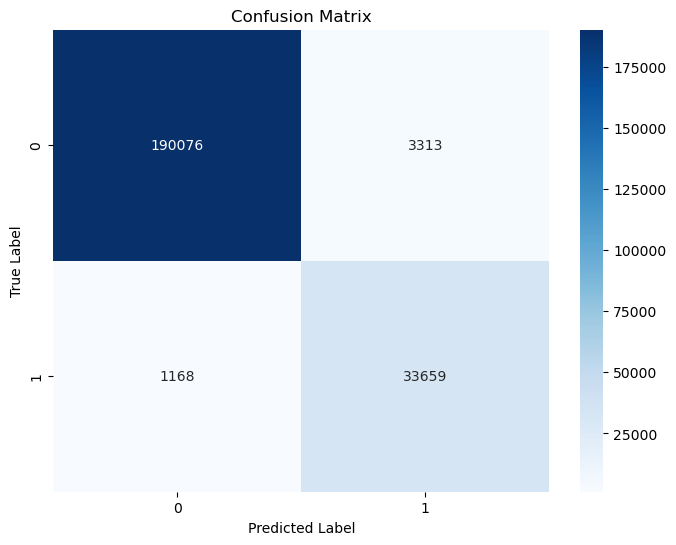

True Positives (TP): 33659
True Negatives (TN): 190076
False Positives (FP): 3313
False Negatives (FN): 1168


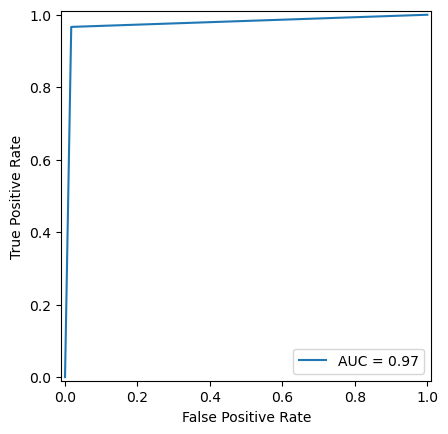

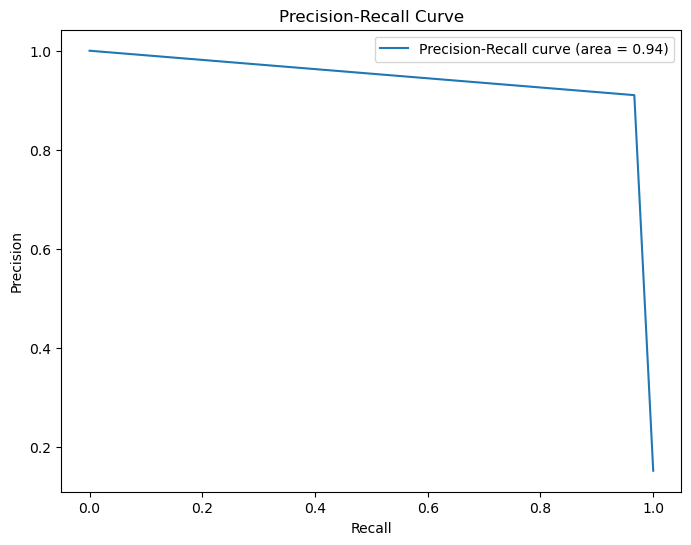

In [46]:
randomforest.fit(X_over_sampled_train, y_over_sampled_train)
y_pred = randomforest.predict(X_test)
print_metrics(y_test,y_pred)

### SMOTE Data

Accuracy:	0.977
Precision:	0.9788700747351488
Recall:		0.977
F1-Score:	0.978
Average Precision Score: 0.8697435146591259
Balanced Accuracy Score: 0.9745771859208407
Matthews Correlation Coefficient (MCC): 0.9171389986123931
AUC : 0.97458


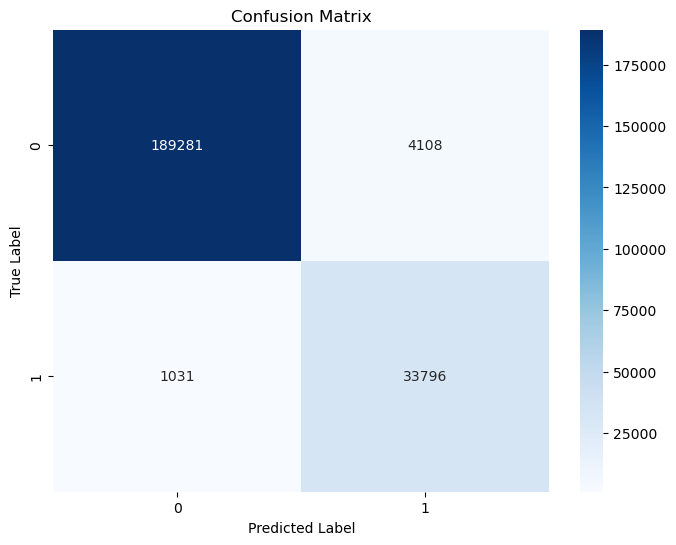

True Positives (TP): 33796
True Negatives (TN): 189281
False Positives (FP): 4108
False Negatives (FN): 1031


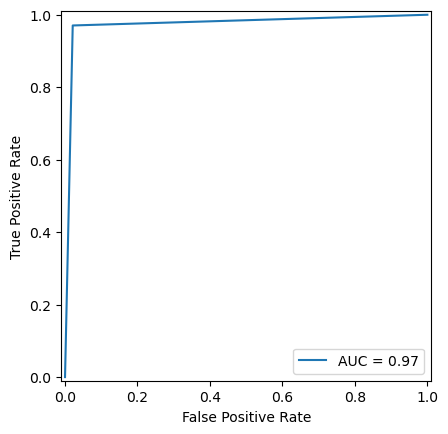

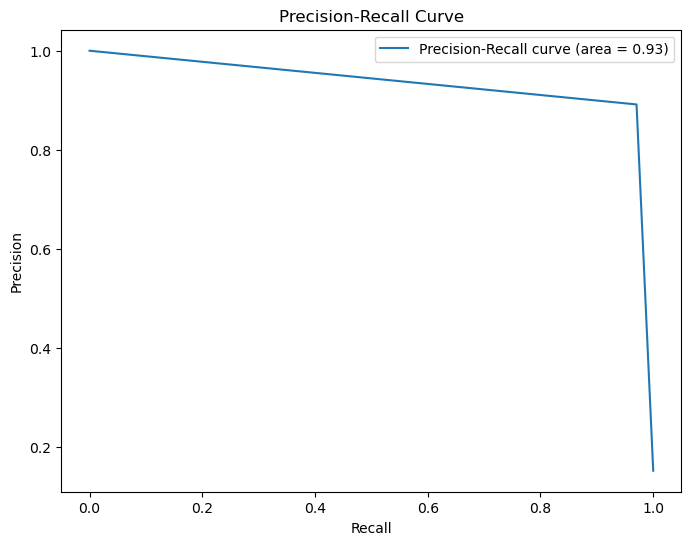

In [47]:
randomforest.fit(X_smote_train, y_smote_train)
y_pred = randomforest.predict(X_test)
print_metrics(y_test,y_pred)

### ADASYN Data

Accuracy:	0.894
Precision:	0.9371871903005747
Recall:		0.894
F1-Score:	0.904
Average Precision Score: 0.5901323304146259
Balanced Accuracy Score: 0.9366599319612202
Matthews Correlation Coefficient (MCC): 0.7182457392390442
AUC : 0.93666


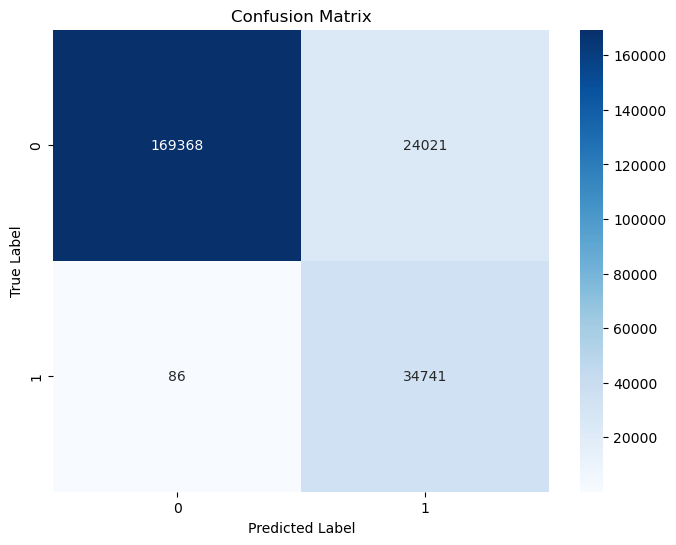

True Positives (TP): 34741
True Negatives (TN): 169368
False Positives (FP): 24021
False Negatives (FN): 86


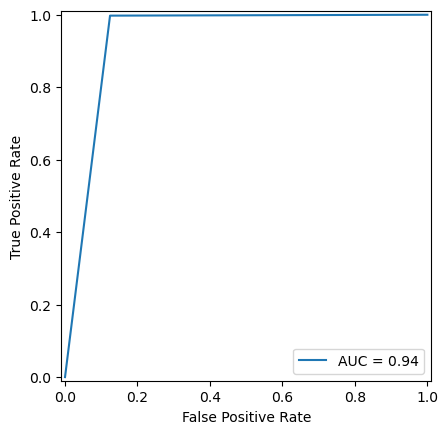

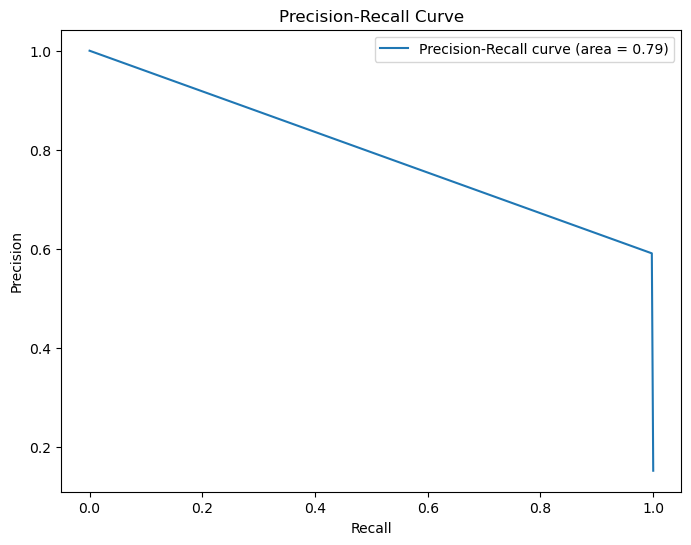

In [48]:
randomforest.fit(X_adasyn_train, y_adasyn_train)
y_pred = randomforest.predict(X_test)
print_metrics(y_test,y_pred)

## KNN

In [49]:
# Declare KNN Model
knn = KNeighborsClassifier()

### Original Data

Accuracy:	0.985
Precision:	0.9854215996461828
Recall:		0.985
F1-Score:	0.985
Average Precision Score: 0.9135517050433635
Balanced Accuracy Score: 0.9732185130367224
Matthews Correlation Coefficient (MCC): 0.943624405464085
AUC : 0.97322


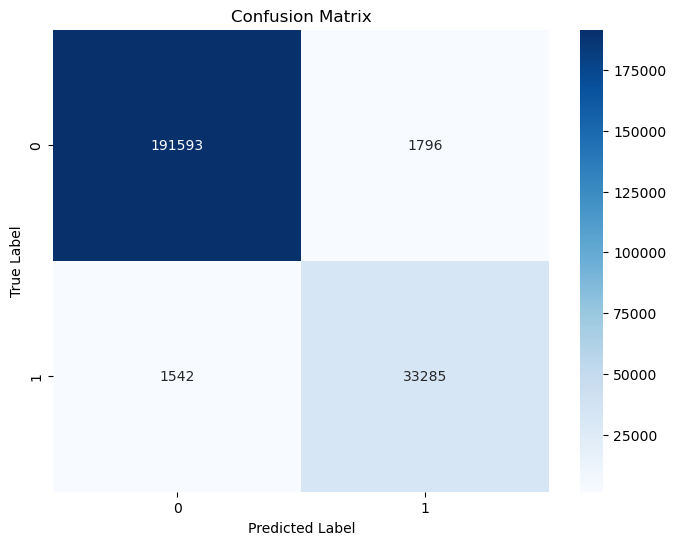

True Positives (TP): 33285
True Negatives (TN): 191593
False Positives (FP): 1796
False Negatives (FN): 1542


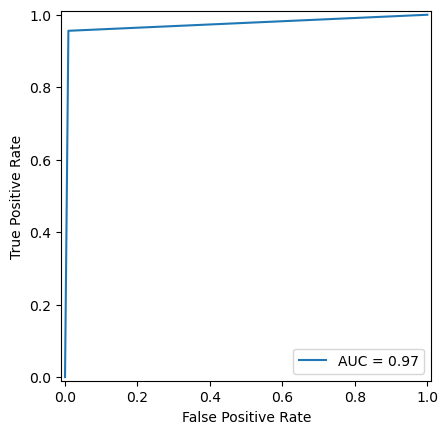

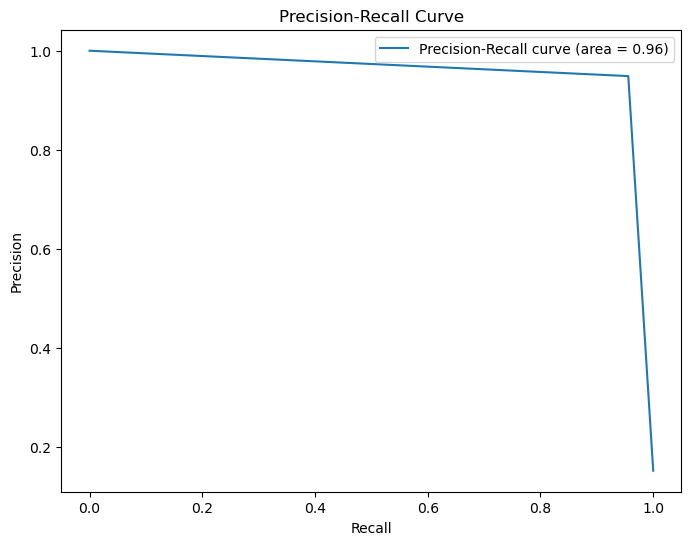

In [50]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print_metrics(y_test,y_pred)

### UnderSampled Data

Accuracy:	0.979
Precision:	0.979319540193459
Recall:		0.979
F1-Score:	0.978
Average Precision Score: 0.8824242210297601
Balanced Accuracy Score: 0.9319411939326948
Matthews Correlation Coefficient (MCC): 0.9168650015420444
AUC : 0.93194


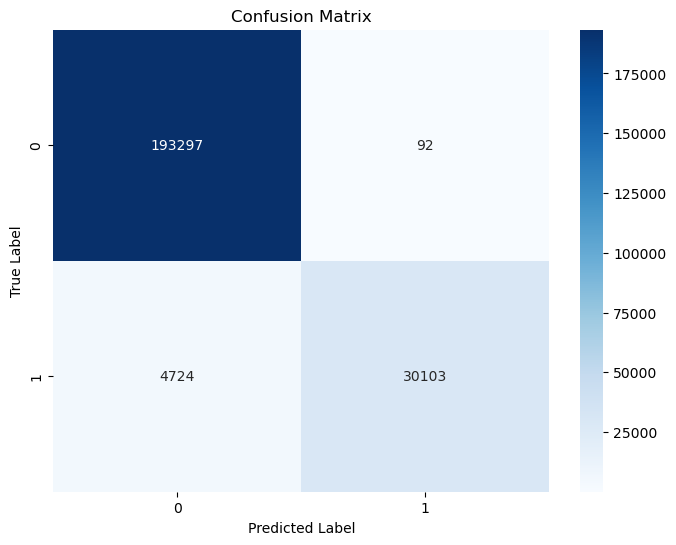

True Positives (TP): 30103
True Negatives (TN): 193297
False Positives (FP): 92
False Negatives (FN): 4724


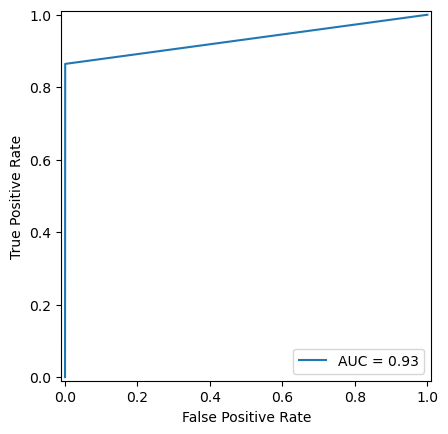

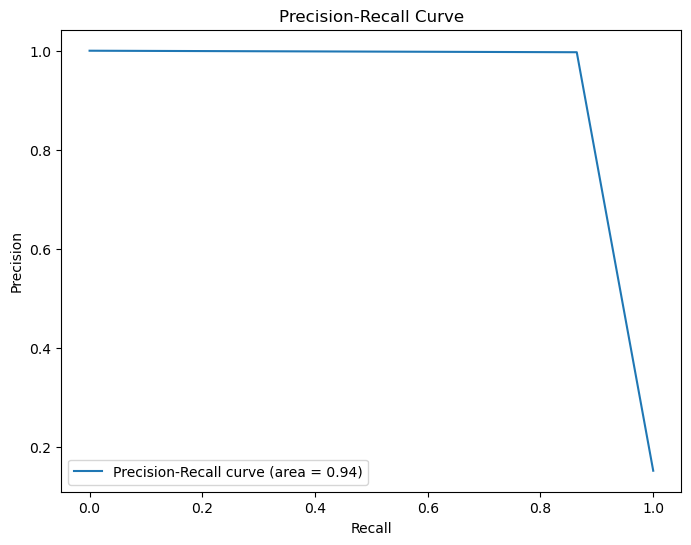

In [51]:
knn.fit(X_under_sampled_train, y_under_sampled_train)
y_pred = knn.predict(X_test)
print_metrics(y_test,y_pred)

### OverSampled Data

Accuracy:	0.988
Precision:	0.9880683819983297
Recall:		0.988
F1-Score:	0.988
Average Precision Score: 0.9304692723459098
Balanced Accuracy Score: 0.9732085700638908
Matthews Correlation Coefficient (MCC): 0.9538075045262531
AUC : 0.97321


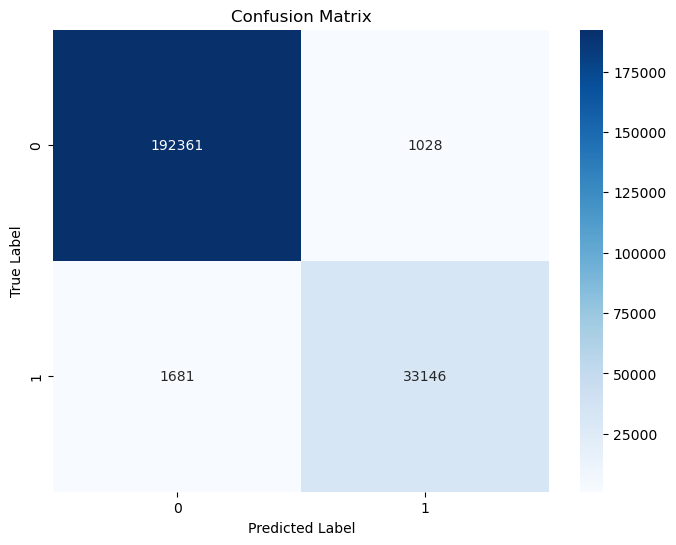

True Positives (TP): 33146
True Negatives (TN): 192361
False Positives (FP): 1028
False Negatives (FN): 1681


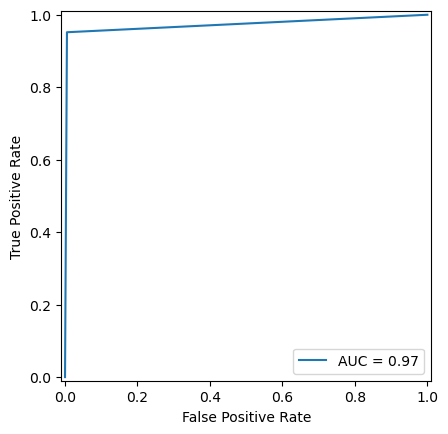

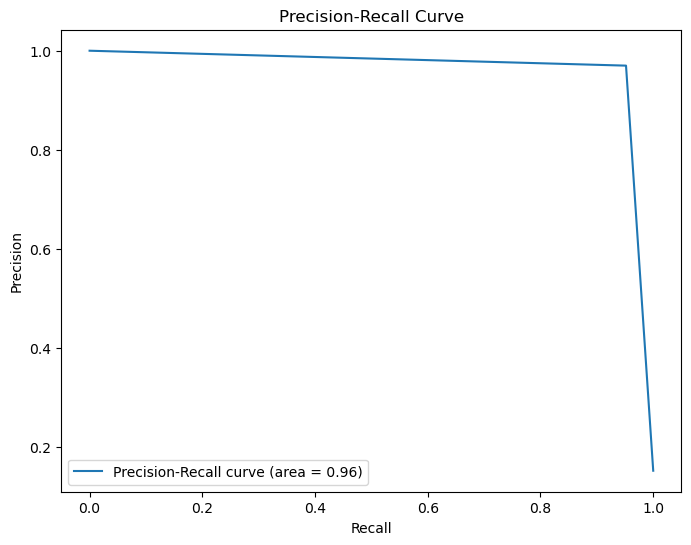

In [52]:
knn.fit(X_over_sampled_train, y_over_sampled_train)
y_pred = knn.predict(X_test)
print_metrics(y_test,y_pred)

### SMOTE Data

Accuracy:	0.988
Precision:	0.9880902303850978
Recall:		0.988
F1-Score:	0.988
Average Precision Score: 0.930604351429799
Balanced Accuracy Score: 0.9732214973761992
Matthews Correlation Coefficient (MCC): 0.9538910567540153
AUC : 0.97322


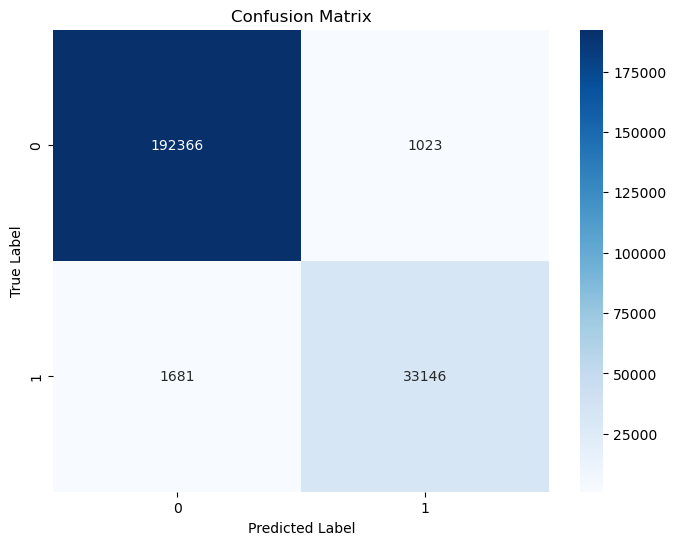

True Positives (TP): 33146
True Negatives (TN): 192366
False Positives (FP): 1023
False Negatives (FN): 1681


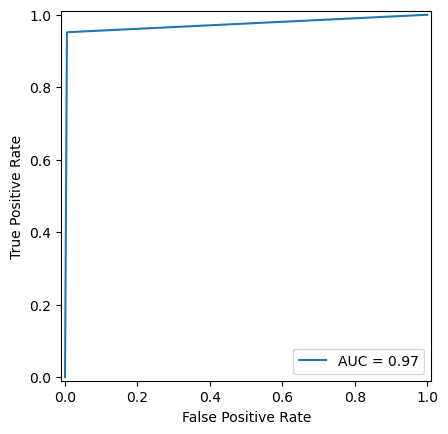

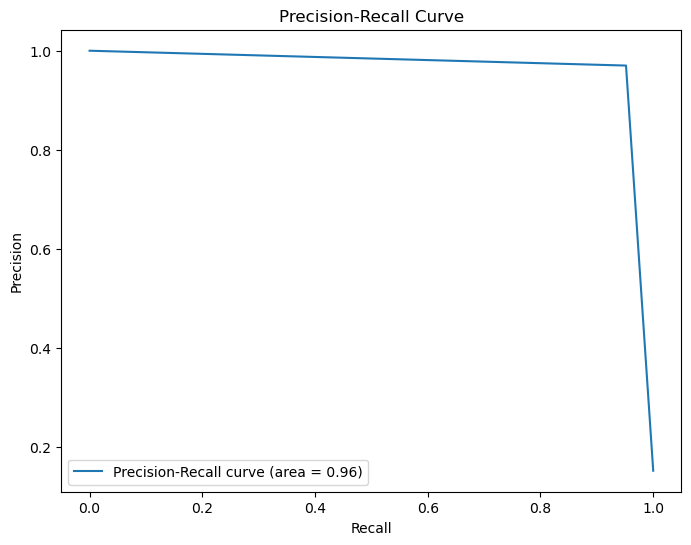

In [53]:
knn.fit(X_smote_train, y_smote_train)
y_pred = knn.predict(X_test)
print_metrics(y_test,y_pred)

### ADASYN Data

Accuracy:	0.988
Precision:	0.9880468320763723
Recall:		0.988
F1-Score:	0.988
Average Precision Score: 0.9303261435099143
Balanced Accuracy Score: 0.9732309563960694
Matthews Correlation Coefficient (MCC): 0.9537261829613942
AUC : 0.97323


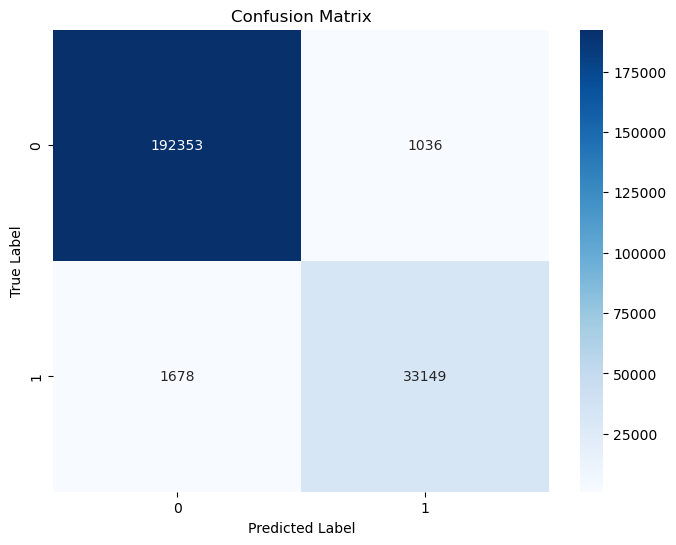

True Positives (TP): 33149
True Negatives (TN): 192353
False Positives (FP): 1036
False Negatives (FN): 1678


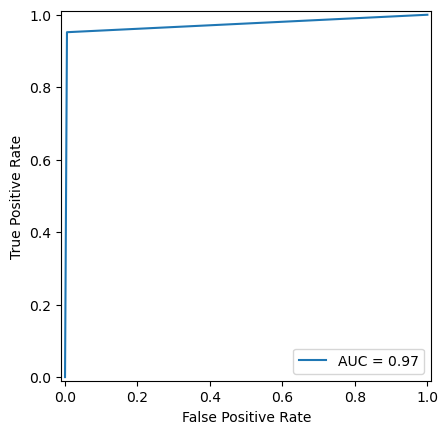

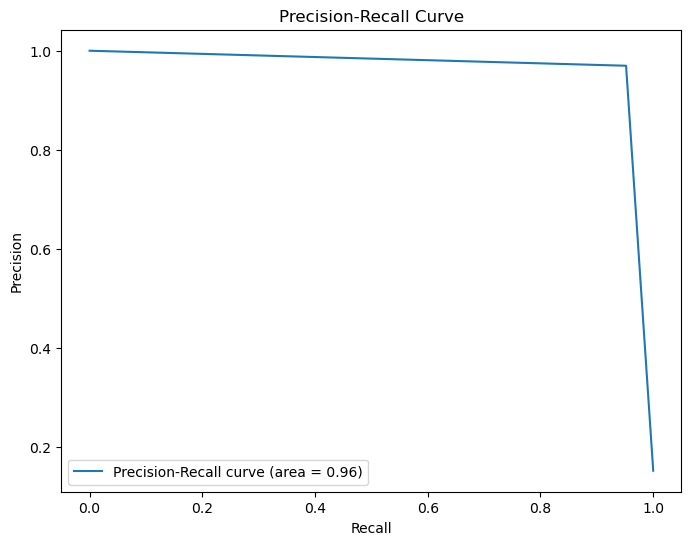

In [54]:
knn.fit(X_adasyn_train, y_adasyn_train)
y_pred = knn.predict(X_test)
print_metrics(y_test,y_pred)